In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../merged_tennis_files/merged_file.csv')

In [2]:
df

tourney_id                tourney_name surface  draw_size  \
0       2019-M020                    Brisbane    Hard       32.0   
1       2019-M020                    Brisbane    Hard       32.0   
2       2019-M020                    Brisbane    Hard       32.0   
3       2019-M020                    Brisbane    Hard       32.0   
4       2019-M020                    Brisbane    Hard       32.0   
...           ...                         ...     ...        ...   
194991   2014-605                 Tour Finals    Hard        8.0   
194992   2014-605                 Tour Finals    Hard        8.0   
194993  2014-D015  Davis Cup WG F: FRA vs SUI    Clay        4.0   
194994  2014-D015  Davis Cup WG F: FRA vs SUI    Clay        4.0   
194995  2014-D015  Davis Cup WG F: FRA vs SUI    Clay        4.0   

       tourney_level  tourney_date  match_num  winner_id  winner_seed  \
0                  A      20181231        300     105453          2.0   
1                  A      20181231        299     106421          4.0   
2                  A      20181231        298     105453          2.0   
3                  A      20181231        297     104542          NaN   
4                  A      20181231        296     106421          4.0   
...              ...           ...        ...        ...          ...   
194991             F      20141109        514     104925          1.0   
194992             F      20141109        515     104925          1.0   
194993             D      20141121          1     104527          NaN   
194994             D      20141121          2     104792          NaN   
194995             D      20141121          4     103819          NaN   

       winner_entry  ... l_1stIn l_1stWon  l_2ndWon l_SvGms  l_bpSaved  \
0               NaN  ...    54.0     34.0      20.0    14.0       10.0   
1               NaN  ...    52.0     36.0       7.0    10.0       10.0   
2               NaN  ...    27.0     15.0       6.0     8.0        1.0   
3                PR  ...    60.0     38.0       9.0    11.0        4.0   
4               NaN  ...    56.0     46.0      19.0    15.0        2.0   
...             ...  ...     ...      ...       ...     ...        ...   
194991          NaN  ...    38.0     29.0       5.0    11.0        3.0   
194992          NaN  ...     NaN      NaN       NaN     NaN        NaN   
194993          NaN  ...     NaN      NaN       NaN     NaN        NaN   
194994          NaN  ...     NaN      NaN       NaN     NaN        NaN   
194995          NaN  ...     NaN      NaN       NaN     NaN        NaN   

        l_bpFaced  winner_rank winner_rank_points loser_rank loser_rank_points  
0            15.0          9.0             3590.0       16.0            1977.0  
1            13.0         16.0             1977.0      239.0             200.0  
2             5.0          9.0             3590.0       40.0            1050.0  
3             6.0        239.0              200.0       31.0            1298.0  
4             4.0         16.0             1977.0       18.0            1855.0  
...           ...          ...                ...        ...               ...  
194991        9.0          1.0            10010.0        5.0            4625.0  
194992        NaN          1.0            10010.0        2.0            8700.0  
194993        NaN          4.0             5295.0       12.0            2740.0  
194994        NaN         19.0             1825.0        2.0            9700.0  
194995        NaN          2.0             9700.0       26.0            1350.0  

[194996 rows x 49 columns]

In [3]:
required_cols = [
    'winner_name', 'loser_name',
    'winner_age', 'loser_age',
    'winner_rank', 'loser_rank',
    'winner_ht', 'loser_ht',
    'winner_hand', 'loser_hand',
    'w_ace', 'l_ace',
    'w_df', 'l_df',
    'w_svpt', 'l_svpt',
    'w_1stIn', 'l_1stIn',
    'w_1stWon', 'w_1stWon',
    'l_2ndWon', 'w_1stWon',
    'w_SvGms', 'l_SvGms',
    'w_bpSaved', 'l_bpSaved',
    'w_bpFaced', 'l_bpFaced',
    'surface', 'best_of', 'round',
    'tourney_date', 'score', 'minutes'
]

df = df.dropna(subset=required_cols).reset_index(drop=True)

In [4]:
df

tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0      2019-M020     Brisbane    Hard       32.0             A      20181231   
1      2019-M020     Brisbane    Hard       32.0             A      20181231   
2      2019-M020     Brisbane    Hard       32.0             A      20181231   
3      2019-M020     Brisbane    Hard       32.0             A      20181231   
4      2019-M020     Brisbane    Hard       32.0             A      20181231   
...          ...          ...     ...        ...           ...           ...   
93319   2014-605  Tour Finals    Hard        8.0             F      20141109   
93320   2014-605  Tour Finals    Hard        8.0             F      20141109   
93321   2014-605  Tour Finals    Hard        8.0             F      20141109   
93322   2014-605  Tour Finals    Hard        8.0             F      20141109   
93323   2014-605  Tour Finals    Hard        8.0             F      20141109   

       match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0            300     105453          2.0          NaN  ...    54.0     34.0   
1            299     106421          4.0          NaN  ...    52.0     36.0   
2            298     105453          2.0          NaN  ...    27.0     15.0   
3            297     104542          NaN           PR  ...    60.0     38.0   
4            296     106421          4.0          NaN  ...    56.0     46.0   
...          ...        ...          ...          ...  ...     ...      ...   
93319        510     105453          4.0          NaN  ...    48.0     30.0   
93320        511     103819          2.0          NaN  ...    28.0     22.0   
93321        512     104918          5.0          NaN  ...    33.0     23.0   
93322        513     103819          2.0          NaN  ...    47.0     38.0   
93323        514     104925          1.0          NaN  ...    38.0     29.0   

       l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_rank winner_rank_points  \
0          20.0    14.0       10.0       15.0          9.0             3590.0   
1           7.0    10.0       10.0       13.0         16.0             1977.0   
2           6.0     8.0        1.0        5.0          9.0             3590.0   
3           9.0    11.0        4.0        6.0        239.0              200.0   
4          19.0    15.0        2.0        4.0         16.0             1977.0   
...         ...     ...        ...        ...          ...                ...   
93319      20.0    14.0        4.0        9.0          5.0             4625.0   
93320      15.0     9.0        4.0        6.0          2.0             8700.0   
93321      14.0    10.0        2.0        5.0          6.0             4475.0   
93322      36.0    17.0        6.0        9.0          2.0             8700.0   
93323       5.0    11.0        3.0        9.0          1.0            10010.0   

      loser_rank loser_rank_points  
0           16.0            1977.0  
1          239.0             200.0  
2           40.0            1050.0  
3           31.0            1298.0  
4           18.0            1855.0  
...          ...               ...  
93319       10.0            4045.0  
93320        8.0            4440.0  
93321        8.0            4440.0  
93322        4.0            4895.0  
93323        5.0            4625.0  

[93324 rows x 49 columns]

In [5]:
df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')
df['surface'] = df['surface'].str.upper()
df['round'] = df['round'].str.upper()

# Remove walkovers / retirements
df = df[~df['score'].str.contains('W/O', regex=False)]
df = df[~df['score'].str.contains('RET', regex=False)]

df = df.sort_values('tourney_date').reset_index(drop=True)

In [6]:
df

tourney_id     tourney_name surface  draw_size tourney_level  \
0       1991-354       Wellington    HARD       32.0             A   
1       1991-339         Adelaide    HARD       32.0             A   
2       1991-339         Adelaide    HARD       32.0             A   
3       1991-339         Adelaide    HARD       32.0             A   
4       1991-339         Adelaide    HARD       32.0             A   
...          ...              ...     ...        ...           ...   
90803  2024-7696  Next Gen Finals    HARD        8.0             F   
90804  2024-7696  Next Gen Finals    HARD        8.0             F   
90805  2024-7696  Next Gen Finals    HARD        8.0             F   
90806  2024-7696  Next Gen Finals    HARD        8.0             F   
90807  2024-7696  Next Gen Finals    HARD        8.0             F   

      tourney_date  match_num  winner_id  winner_seed winner_entry  ...  \
0       1990-12-31         15     101761          NaN          NaN  ...   
1       1990-12-31         26     101900          NaN          NaN  ...   
2       1990-12-31         25     101723          NaN          NaN  ...   
3       1990-12-31         24     101793          2.0          NaN  ...   
4       1990-12-31         23     101441          NaN            Q  ...   
...            ...        ...        ...          ...          ...  ...   
90803   2024-12-18        388     209414          6.0          NaN  ...   
90804   2024-12-18        387     210460          7.0          NaN  ...   
90805   2024-12-18        386     209414          6.0          NaN  ...   
90806   2024-12-18        400     211663          8.0          NaN  ...   
90807   2024-12-18        398     210530          5.0          NaN  ...   

      l_1stIn l_1stWon  l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_rank  \
0        53.0     36.0      19.0    13.0        3.0        6.0        113.0   
1        29.0     14.0       6.0     8.0        3.0       10.0         51.0   
2        54.0     45.0      21.0    15.0        7.0        8.0         56.0   
3        36.0     21.0      14.0    10.0        6.0       10.0         25.0   
4        50.0     31.0      15.0    14.0        4.0        9.0        111.0   
...       ...      ...       ...     ...        ...        ...          ...   
90803    50.0     35.0       9.0    11.0       11.0       13.0        128.0   
90804    44.0     27.0      18.0    12.0        6.0       11.0        138.0   
90805    50.0     35.0      14.0    12.0       11.0       14.0        128.0   
90806    51.0     33.0      10.0    11.0        6.0        9.0        145.0   
90807    55.0     38.0       7.0    13.0        5.0        9.0        122.0   

      winner_rank_points loser_rank loser_rank_points  
0                    NaN       93.0               NaN  
1                    NaN       62.0               NaN  
2                    NaN       82.0               NaN  
3                    NaN       54.0               NaN  
4                    NaN      101.0               NaN  
...                  ...        ...               ...  
90803              471.0       50.0            1115.0  
90804              440.0       50.0            1115.0  
90805              471.0      138.0             440.0  
90806              409.0      122.0             493.0  
90807              493.0       41.0            1245.0  

[90808 rows x 49 columns]

In [7]:
np.random.seed(42)
swap = np.random.rand(len(df)) > 0.5

In [8]:
df

tourney_id     tourney_name surface  draw_size tourney_level  \
0       1991-354       Wellington    HARD       32.0             A   
1       1991-339         Adelaide    HARD       32.0             A   
2       1991-339         Adelaide    HARD       32.0             A   
3       1991-339         Adelaide    HARD       32.0             A   
4       1991-339         Adelaide    HARD       32.0             A   
...          ...              ...     ...        ...           ...   
90803  2024-7696  Next Gen Finals    HARD        8.0             F   
90804  2024-7696  Next Gen Finals    HARD        8.0             F   
90805  2024-7696  Next Gen Finals    HARD        8.0             F   
90806  2024-7696  Next Gen Finals    HARD        8.0             F   
90807  2024-7696  Next Gen Finals    HARD        8.0             F   

      tourney_date  match_num  winner_id  winner_seed winner_entry  ...  \
0       1990-12-31         15     101761          NaN          NaN  ...   
1       1990-12-31         26     101900          NaN          NaN  ...   
2       1990-12-31         25     101723          NaN          NaN  ...   
3       1990-12-31         24     101793          2.0          NaN  ...   
4       1990-12-31         23     101441          NaN            Q  ...   
...            ...        ...        ...          ...          ...  ...   
90803   2024-12-18        388     209414          6.0          NaN  ...   
90804   2024-12-18        387     210460          7.0          NaN  ...   
90805   2024-12-18        386     209414          6.0          NaN  ...   
90806   2024-12-18        400     211663          8.0          NaN  ...   
90807   2024-12-18        398     210530          5.0          NaN  ...   

      l_1stIn l_1stWon  l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_rank  \
0        53.0     36.0      19.0    13.0        3.0        6.0        113.0   
1        29.0     14.0       6.0     8.0        3.0       10.0         51.0   
2        54.0     45.0      21.0    15.0        7.0        8.0         56.0   
3        36.0     21.0      14.0    10.0        6.0       10.0         25.0   
4        50.0     31.0      15.0    14.0        4.0        9.0        111.0   
...       ...      ...       ...     ...        ...        ...          ...   
90803    50.0     35.0       9.0    11.0       11.0       13.0        128.0   
90804    44.0     27.0      18.0    12.0        6.0       11.0        138.0   
90805    50.0     35.0      14.0    12.0       11.0       14.0        128.0   
90806    51.0     33.0      10.0    11.0        6.0        9.0        145.0   
90807    55.0     38.0       7.0    13.0        5.0        9.0        122.0   

      winner_rank_points loser_rank loser_rank_points  
0                    NaN       93.0               NaN  
1                    NaN       62.0               NaN  
2                    NaN       82.0               NaN  
3                    NaN       54.0               NaN  
4                    NaN      101.0               NaN  
...                  ...        ...               ...  
90803              471.0       50.0            1115.0  
90804              440.0       50.0            1115.0  
90805              471.0      138.0             440.0  
90806              409.0      122.0             493.0  
90807              493.0       41.0            1245.0  

[90808 rows x 49 columns]

In [9]:
ml = pd.DataFrame()

In [10]:
# Match context
ml['tourney_date'] = df['tourney_date']
ml['surface'] = df['surface']
ml['round'] = df['round']
ml['best_of'] = df['best_of']
ml['minutes'] = df['minutes']

In [11]:
ml

tourney_date surface round  best_of  minutes
0       1990-12-31    HARD   R32        3    107.0
1       1990-12-31    HARD    QF        3     55.0
2       1990-12-31    HARD    QF        3    119.0
3       1990-12-31    HARD   R16        3     81.0
4       1990-12-31    HARD   R16        3    109.0
...            ...     ...   ...      ...      ...
90803   2024-12-18    HARD    RR        5    116.0
90804   2024-12-18    HARD    RR        5     93.0
90805   2024-12-18    HARD    RR        5    120.0
90806   2024-12-18    HARD     F        5     87.0
90807   2024-12-18    HARD    SF        5     95.0

[90808 rows x 5 columns]

In [12]:
"""SERVER STATS
'w_ace', 'l_ace',
    'w_df', 'l_df',
    'w_svpt', 'l_svpt',
    'w_1stIn', 'l_1stIn',
    'w_1stWon', 'l_1stWon,
    'w_2ndWon', 'l_2ndWon',
    'w_SvGms', 'l_SvGms',
    'w_bpSaved', 'l_bpSaved',
    'w_bpFaced', 'l_bpFaced',
"""

# Player A
ml['PA_NAME'] = np.where(swap, df['loser_name'], df['winner_name'])
ml['PA_AGE'] = np.where(swap, df['loser_age'], df['winner_age'])
ml['PA_RANK'] = np.where(swap, df['loser_rank'], df['winner_rank'])
ml['PA_HEIGHT'] = np.where(swap, df['loser_ht'], df['winner_ht'])
ml['PA_HAND'] = np.where(swap, df['loser_hand'], df['winner_hand'])

ml['PA_ACE'] = np.where(swap, df['l_ace'], df['w_ace'])
ml['PA_SVPT'] = np.where(swap, df['l_svpt'], df['w_svpt'])
ml['PA_1STIN'] = np.where(swap, df['l_1stIn'], df['w_1stIn'])
ml['PA_1STWON'] = np.where(swap, df['l_1stWon'], df['w_1stWon'])
ml['PA_2NDWON'] = np.where(swap, df['l_2ndWon'], df['w_2ndWon'])
ml['PA_SVGMS'] = np.where(swap, df['l_SvGms'], df['w_SvGms'])
ml['PA_BPSAVED'] = np.where(swap, df['l_bpSaved'], df['w_bpSaved'])
ml['PA_BPFACED'] = np.where(swap, df['l_bpFaced'], df['w_bpFaced'])

# Player B
ml['PB_NAME'] = np.where(swap, df['winner_name'], df['loser_name'])
ml['PB_AGE'] = np.where(swap, df['winner_age'], df['loser_age'])
ml['PB_RANK'] = np.where(swap, df['winner_rank'], df['loser_rank'])
ml['PB_HEIGHT'] = np.where(swap, df['winner_ht'], df['loser_ht'])
ml['PB_HAND'] = np.where(swap, df['winner_hand'], df['loser_hand'])

ml['PB_ACE'] = np.where(swap, df['w_ace'], df['l_ace'])
ml['PB_SVPT'] = np.where(swap, df['w_svpt'], df['l_svpt'])
ml['PB_1STIN'] = np.where(swap, df['w_1stIn'], df['l_1stIn'])
ml['PB_1STWON'] = np.where(swap, df['w_1stWon'], df['l_1stWon'])
ml['PB_2NDWON'] = np.where(swap, df['w_2ndWon'], df['l_2ndWon'])
ml['PB_SVGMS'] = np.where(swap, df['w_SvGms'], df['l_SvGms'])
ml['PB_BPSAVED'] = np.where(swap, df['w_bpSaved'], df['l_bpSaved'])
ml['PB_BPFACED'] = np.where(swap, df['w_bpFaced'], df['l_bpFaced'])


In [13]:
# Target
ml['player_a_win'] = np.where(swap, 0, 1)

In [14]:
ml

tourney_date surface round  best_of  minutes          PA_NAME  PA_AGE  \
0       1990-12-31    HARD   R32        3    107.0     Jaime Oncins    20.5   
1       1990-12-31    HARD    QF        3     55.0  Fabrice Santoro    18.0   
2       1990-12-31    HARD    QF        3    119.0    Patrik Kuhnen    24.8   
3       1990-12-31    HARD   R16        3     81.0    Paul Haarhuis    24.8   
4       1990-12-31    HARD   R16        3    109.0    Martin Sinner    22.8   
...            ...     ...   ...      ...      ...              ...     ...   
90803   2024-12-18    HARD    RR        5    116.0  Luca Van Assche    20.5   
90804   2024-12-18    HARD    RR        5     93.0   Juncheng Shang    19.8   
90805   2024-12-18    HARD    RR        5    120.0  Luca Van Assche    20.5   
90806   2024-12-18    HARD     F        5     87.0     Joao Fonseca    18.3   
90807   2024-12-18    HARD    SF        5     95.0     Learner Tien    19.0   

       PA_RANK  PA_HEIGHT PA_HAND  ...  PB_HAND  PB_ACE  PB_SVPT  PB_1STIN  \
0        113.0      196.0       R  ...        R     2.0     91.0      53.0   
1         62.0      178.0       R  ...        R     0.0     36.0      17.0   
2         82.0      190.0       R  ...        R    11.0     97.0      65.0   
3         54.0      188.0       R  ...        R     2.0     55.0      37.0   
4        111.0      180.0       R  ...        L     3.0     78.0      50.0   
...        ...        ...     ...  ...      ...     ...      ...       ...   
90803    128.0      178.0       R  ...        L     7.0     78.0      50.0   
90804     50.0      180.0       L  ...        R    14.0     64.0      45.0   
90805    128.0      178.0       R  ...        R     3.0     86.0      50.0   
90806    145.0      185.0       R  ...        L     4.0     72.0      51.0   
90807    122.0      180.0       L  ...        R     7.0     73.0      55.0   

       PB_1STWON  PB_2NDWON  PB_SVGMS  PB_BPSAVED PB_BPFACED  player_a_win  
0           36.0       19.0      13.0         3.0        6.0             1  
1           11.0       13.0       7.0         1.0        3.0             0  
2           54.0       14.0      15.0         1.0        2.0             0  
3           24.0       14.0      10.0         2.0        4.0             0  
4           31.0       15.0      14.0         4.0        9.0             1  
...          ...        ...       ...         ...        ...           ...  
90803       35.0        9.0      11.0        11.0       13.0             1  
90804       35.0        9.0      11.0         5.0        6.0             0  
90805       35.0       14.0      12.0        11.0       14.0             1  
90806       33.0       10.0      11.0         6.0        9.0             1  
90807       38.0        7.0      13.0         5.0        9.0             1  

[90808 rows x 32 columns]

In [15]:
"""SERVER STATS
'w_ace', 'l_ace',
    'w_df', 'l_df',
    'w_svpt', 'l_svpt',
    'w_1stIn', 'l_1stIn',
    'w_1stWon', 'l_1stWon,
    'w_2ndWon', 'l_2ndWon',
    'w_SvGms', 'l_SvGms',
    'w_bpSaved', 'l_bpSaved',
    'w_bpFaced', 'l_bpFaced',
"""

ml['RANK_DIFF'] = ml["PA_RANK"] - ml['PB_RANK']
ml['AGE_DIFF'] = ml["PA_AGE"] - ml['PB_AGE']
ml['HEIGHT_DIFF'] = ml['PA_HEIGHT'] - ml['PB_HEIGHT']

ml['ACE_DIFF'] = ml['PA_ACE'] - ml['PB_ACE']
ml['SVPT_DIFF'] = ml['PA_SVPT'] - ml['PB_SVPT']
ml['1STIN_DIFF'] = ml['PA_1STIN'] - ml['PB_1STIN']
ml['1STWON_DIFF'] = ml['PA_1STWON'] - ml['PB_1STWON']
ml['2NDWON_DIFF'] = ml['PA_2NDWON'] - ml['PB_2NDWON']
ml['SVGMS_DIFF'] = ml['PA_SVGMS'] - ml['PB_SVGMS']
ml['BPFACED_DIFF'] = ml['PA_BPFACED'] - ml['PB_BPFACED']
ml['BPSAVED_DIFF'] = ml['PA_BPSAVED'] - ml['PB_BPSAVED']

In [16]:
ml

tourney_date surface round  best_of  minutes          PA_NAME  PA_AGE  \
0       1990-12-31    HARD   R32        3    107.0     Jaime Oncins    20.5   
1       1990-12-31    HARD    QF        3     55.0  Fabrice Santoro    18.0   
2       1990-12-31    HARD    QF        3    119.0    Patrik Kuhnen    24.8   
3       1990-12-31    HARD   R16        3     81.0    Paul Haarhuis    24.8   
4       1990-12-31    HARD   R16        3    109.0    Martin Sinner    22.8   
...            ...     ...   ...      ...      ...              ...     ...   
90803   2024-12-18    HARD    RR        5    116.0  Luca Van Assche    20.5   
90804   2024-12-18    HARD    RR        5     93.0   Juncheng Shang    19.8   
90805   2024-12-18    HARD    RR        5    120.0  Luca Van Assche    20.5   
90806   2024-12-18    HARD     F        5     87.0     Joao Fonseca    18.3   
90807   2024-12-18    HARD    SF        5     95.0     Learner Tien    19.0   

       PA_RANK  PA_HEIGHT PA_HAND  ...  AGE_DIFF  HEIGHT_DIFF  ACE_DIFF  \
0        113.0      196.0       R  ...      -1.0         16.0       1.0   
1         62.0      178.0       R  ...      -1.6        -12.0       2.0   
2         82.0      190.0       R  ...       4.1         -3.0      -2.0   
3         54.0      188.0       R  ...       4.5          3.0       0.0   
4        111.0      180.0       R  ...      -2.4         -8.0       0.0   
...        ...        ...     ...  ...       ...          ...       ...   
90803    128.0      178.0       R  ...       0.7         -2.0       1.0   
90804     50.0      180.0       L  ...       0.2          0.0      -8.0   
90805    128.0      178.0       R  ...       0.9         -2.0       8.0   
90806    145.0      185.0       R  ...      -0.7          5.0       4.0   
90807    122.0      180.0       L  ...      -1.3        -13.0      -2.0   

       SVPT_DIFF  1STIN_DIFF  1STWON_DIFF  2NDWON_DIFF  SVGMS_DIFF  \
0          -11.0       -10.0         -8.0          3.0         0.0   
1           18.0        12.0          3.0         -7.0         1.0   
2           -1.0       -11.0         -9.0          7.0         0.0   
3            9.0        -1.0         -3.0          0.0         0.0   
4           21.0        16.0         11.0          1.0         1.0   
...          ...         ...          ...          ...         ...   
90803       -2.0         7.0          4.0          2.0         1.0   
90804       14.0        -1.0         -8.0          9.0         1.0   
90805      -13.0        -5.0          4.0          0.0         0.0   
90806       -9.0       -10.0          1.0          5.0         0.0   
90807       -6.0       -14.0         -7.0          9.0         0.0   

      BPFACED_DIFF  BPSAVED_DIFF  
0             -3.0          -3.0  
1              7.0           2.0  
2              6.0           6.0  
3              6.0           4.0  
4             -1.0           0.0  
...            ...           ...  
90803         -9.0          -9.0  
90804          5.0           1.0  
90805        -11.0          -9.0  
90806         -6.0          -4.0  
90807         -5.0          -3.0  

[90808 rows x 43 columns]

In [17]:
ml = ml.dropna().reset_index(drop=True)

In [18]:
### Ensure Chronological order

ml['tourney_date'] = pd.to_datetime(ml['tourney_date'])
ml = ml.sort_values('tourney_date').reset_index(drop=True)

In [19]:
## Elo functions

def expected_score(ra, rb):
    return 1 / (1 + 10 ** ((rb-ra) / 400))

def update_elo(r, expected, score, k=32):
    return r + k * (score-expected)

In [20]:
## elo storage

START = 1500

elo_global = {}
elo_surface = {}

aelo, belo = [], []
aelo_surf, belo_surf = [], []

In [21]:
## compute pre match elo

for _, row in ml.iterrows():
    a = row['PA_NAME']
    b = row['PB_NAME']
    surface = row['surface']

    # global
    ea = elo_global.get(a, START)
    eb = elo_global.get(b, START)

    # surface
    esa = elo_surface.get((a, surface), START)
    esb = elo_surface.get((b, surface), START)

    # store prematch elo
    aelo.append(ea)
    belo.append(eb)
    aelo_surf.append(esa)
    belo_surf.append(esb)

    # match outcome
    score_a = row['player_a_win']
    score_b = 1-score_a

    # expected score
    exp_a = expected_score(ea, eb)
    exp_b = expected_score(eb, ea)

    exp_sa = expected_score(esa, esb)
    exp_sb = expected_score(esb, esa)

    # update global elo
    elo_global[a] = update_elo(ea, exp_a, score_a)
    elo_global[b] = update_elo(eb, exp_b, score_b)

    # update surface elo
    elo_surface[(a, surface)] = update_elo(esa, exp_sa, score_a)
    elo_surface[(b, surface)] = update_elo(esb, exp_sb, score_b)

In [22]:
# add elo features

ml['PA_ELO'] = aelo
ml['PB_ELO'] = belo
ml['ELO_DIFF'] = ml['PA_ELO'] - ml['PB_ELO']

ml['PA_ELO_SURF'] = aelo_surf
ml['PB_ELO_SURF'] = belo_surf
ml['ELO_SURF_DIFF'] = ml['PA_ELO_SURF'] - ml['PB_ELO_SURF']

In [23]:
ml

tourney_date surface round  best_of  minutes          PA_NAME  PA_AGE  \
0       1990-12-31    HARD   R32        3    107.0     Jaime Oncins    20.5   
1       1990-12-31    HARD   R16        3     74.0  Andrew Sznajder    23.6   
2       1990-12-31    HARD   R16        3     75.0     Robbie Weiss    24.0   
3       1990-12-31    HARD   R16        3     74.0    Markus Zoecke    22.6   
4       1990-12-31    HARD   R16        3     73.0      Luiz Mattar    27.3   
...            ...     ...   ...      ...      ...              ...     ...   
90803   2024-12-18    HARD    RR        5    116.0  Luca Van Assche    20.5   
90804   2024-12-18    HARD    RR        5     93.0   Juncheng Shang    19.8   
90805   2024-12-18    HARD    RR        5    120.0  Luca Van Assche    20.5   
90806   2024-12-18    HARD     F        5     87.0     Joao Fonseca    18.3   
90807   2024-12-18    HARD    SF        5     95.0     Learner Tien    19.0   

       PA_RANK  PA_HEIGHT PA_HAND  ...  2NDWON_DIFF  SVGMS_DIFF  BPFACED_DIFF  \
0        113.0      196.0       R  ...          3.0         0.0          -3.0   
1        104.0      175.0       R  ...          2.0         0.0           1.0   
2         89.0      183.0       R  ...          0.0         0.0          -2.0   
3        167.0      196.0       R  ...         -9.0         0.0          15.0   
4         43.0      183.0       R  ...          1.0        -1.0           3.0   
...        ...        ...     ...  ...          ...         ...           ...   
90803    128.0      178.0       R  ...          2.0         1.0          -9.0   
90804     50.0      180.0       L  ...          9.0         1.0           5.0   
90805    128.0      178.0       R  ...          0.0         0.0         -11.0   
90806    145.0      185.0       R  ...          5.0         0.0          -6.0   
90807    122.0      180.0       L  ...          9.0         0.0          -5.0   

       BPSAVED_DIFF       PA_ELO       PB_ELO    ELO_DIFF  PA_ELO_SURF  \
0              -3.0  1500.000000  1500.000000    0.000000  1500.000000   
1               4.0  1500.000000  1500.000000    0.000000  1500.000000   
2              -5.0  1500.000000  1500.000000    0.000000  1500.000000   
3              11.0  1500.000000  1500.000000    0.000000  1500.000000   
4               0.0  1500.000000  1500.000000    0.000000  1500.000000   
...             ...          ...          ...         ...          ...   
90803          -9.0  1489.950266  1684.043568 -194.093302  1479.597644   
90804           1.0  1659.932021  1491.842427  168.089594  1629.297125   
90805          -9.0  1514.061813  1515.030944   -0.969131  1502.968032   
90806          -4.0  1620.301860  1565.952626   54.349234  1602.301760   
90807          -3.0  1552.435283  1694.473362 -142.038079  1540.942803   

       PB_ELO_SURF  ELO_SURF_DIFF  
0      1500.000000       0.000000  
1      1500.000000       0.000000  
2      1500.000000       0.000000  
3      1500.000000       0.000000  
4      1500.000000       0.000000  
...            ...            ...  
90803  1652.667513    -173.069869  
90804  1490.809635     138.487490  
90805  1512.869629      -9.901596  
90806  1554.767318      47.534442  
90807  1667.104593    -126.161790  

[90808 rows x 49 columns]

In [24]:
ml.drop(columns=['PB_HAND', 'PA_HAND', 'best_of', 'minutes', 'round'])

tourney_date surface          PA_NAME  PA_AGE  PA_RANK  PA_HEIGHT  \
0       1990-12-31    HARD     Jaime Oncins    20.5    113.0      196.0   
1       1990-12-31    HARD  Andrew Sznajder    23.6    104.0      175.0   
2       1990-12-31    HARD     Robbie Weiss    24.0     89.0      183.0   
3       1990-12-31    HARD    Markus Zoecke    22.6    167.0      196.0   
4       1990-12-31    HARD      Luiz Mattar    27.3     43.0      183.0   
...            ...     ...              ...     ...      ...        ...   
90803   2024-12-18    HARD  Luca Van Assche    20.5    128.0      178.0   
90804   2024-12-18    HARD   Juncheng Shang    19.8     50.0      180.0   
90805   2024-12-18    HARD  Luca Van Assche    20.5    128.0      178.0   
90806   2024-12-18    HARD     Joao Fonseca    18.3    145.0      185.0   
90807   2024-12-18    HARD     Learner Tien    19.0    122.0      180.0   

       PA_ACE  PA_SVPT  PA_1STIN  PA_1STWON  ...  2NDWON_DIFF  SVGMS_DIFF  \
0         3.0     80.0      43.0       28.0  ...          3.0         0.0   
1         2.0     73.0      46.0       30.0  ...          2.0         0.0   
2         2.0     48.0      24.0       14.0  ...          0.0         0.0   
3         7.0     72.0      49.0       28.0  ...         -9.0         0.0   
4         1.0     63.0      37.0       24.0  ...          1.0        -1.0   
...       ...      ...       ...        ...  ...          ...         ...   
90803     8.0     76.0      57.0       39.0  ...          2.0         1.0   
90804     6.0     78.0      44.0       27.0  ...          9.0         1.0   
90805    11.0     73.0      45.0       39.0  ...          0.0         0.0   
90806     8.0     63.0      41.0       34.0  ...          5.0         0.0   
90807     5.0     67.0      41.0       31.0  ...          9.0         0.0   

       BPFACED_DIFF  BPSAVED_DIFF       PA_ELO       PB_ELO    ELO_DIFF  \
0              -3.0          -3.0  1500.000000  1500.000000    0.000000   
1               1.0           4.0  1500.000000  1500.000000    0.000000   
2              -2.0          -5.0  1500.000000  1500.000000    0.000000   
3              15.0          11.0  1500.000000  1500.000000    0.000000   
4               3.0           0.0  1500.000000  1500.000000    0.000000   
...             ...           ...          ...          ...         ...   
90803          -9.0          -9.0  1489.950266  1684.043568 -194.093302   
90804           5.0           1.0  1659.932021  1491.842427  168.089594   
90805         -11.0          -9.0  1514.061813  1515.030944   -0.969131   
90806          -6.0          -4.0  1620.301860  1565.952626   54.349234   
90807          -5.0          -3.0  1552.435283  1694.473362 -142.038079   

       PA_ELO_SURF  PB_ELO_SURF  ELO_SURF_DIFF  
0      1500.000000  1500.000000       0.000000  
1      1500.000000  1500.000000       0.000000  
2      1500.000000  1500.000000       0.000000  
3      1500.000000  1500.000000       0.000000  
4      1500.000000  1500.000000       0.000000  
...            ...          ...            ...  
90803  1479.597644  1652.667513    -173.069869  
90804  1629.297125  1490.809635     138.487490  
90805  1502.968032  1512.869629      -9.901596  
90806  1602.301760  1554.767318      47.534442  
90807  1540.942803  1667.104593    -126.161790  

[90808 rows x 44 columns]

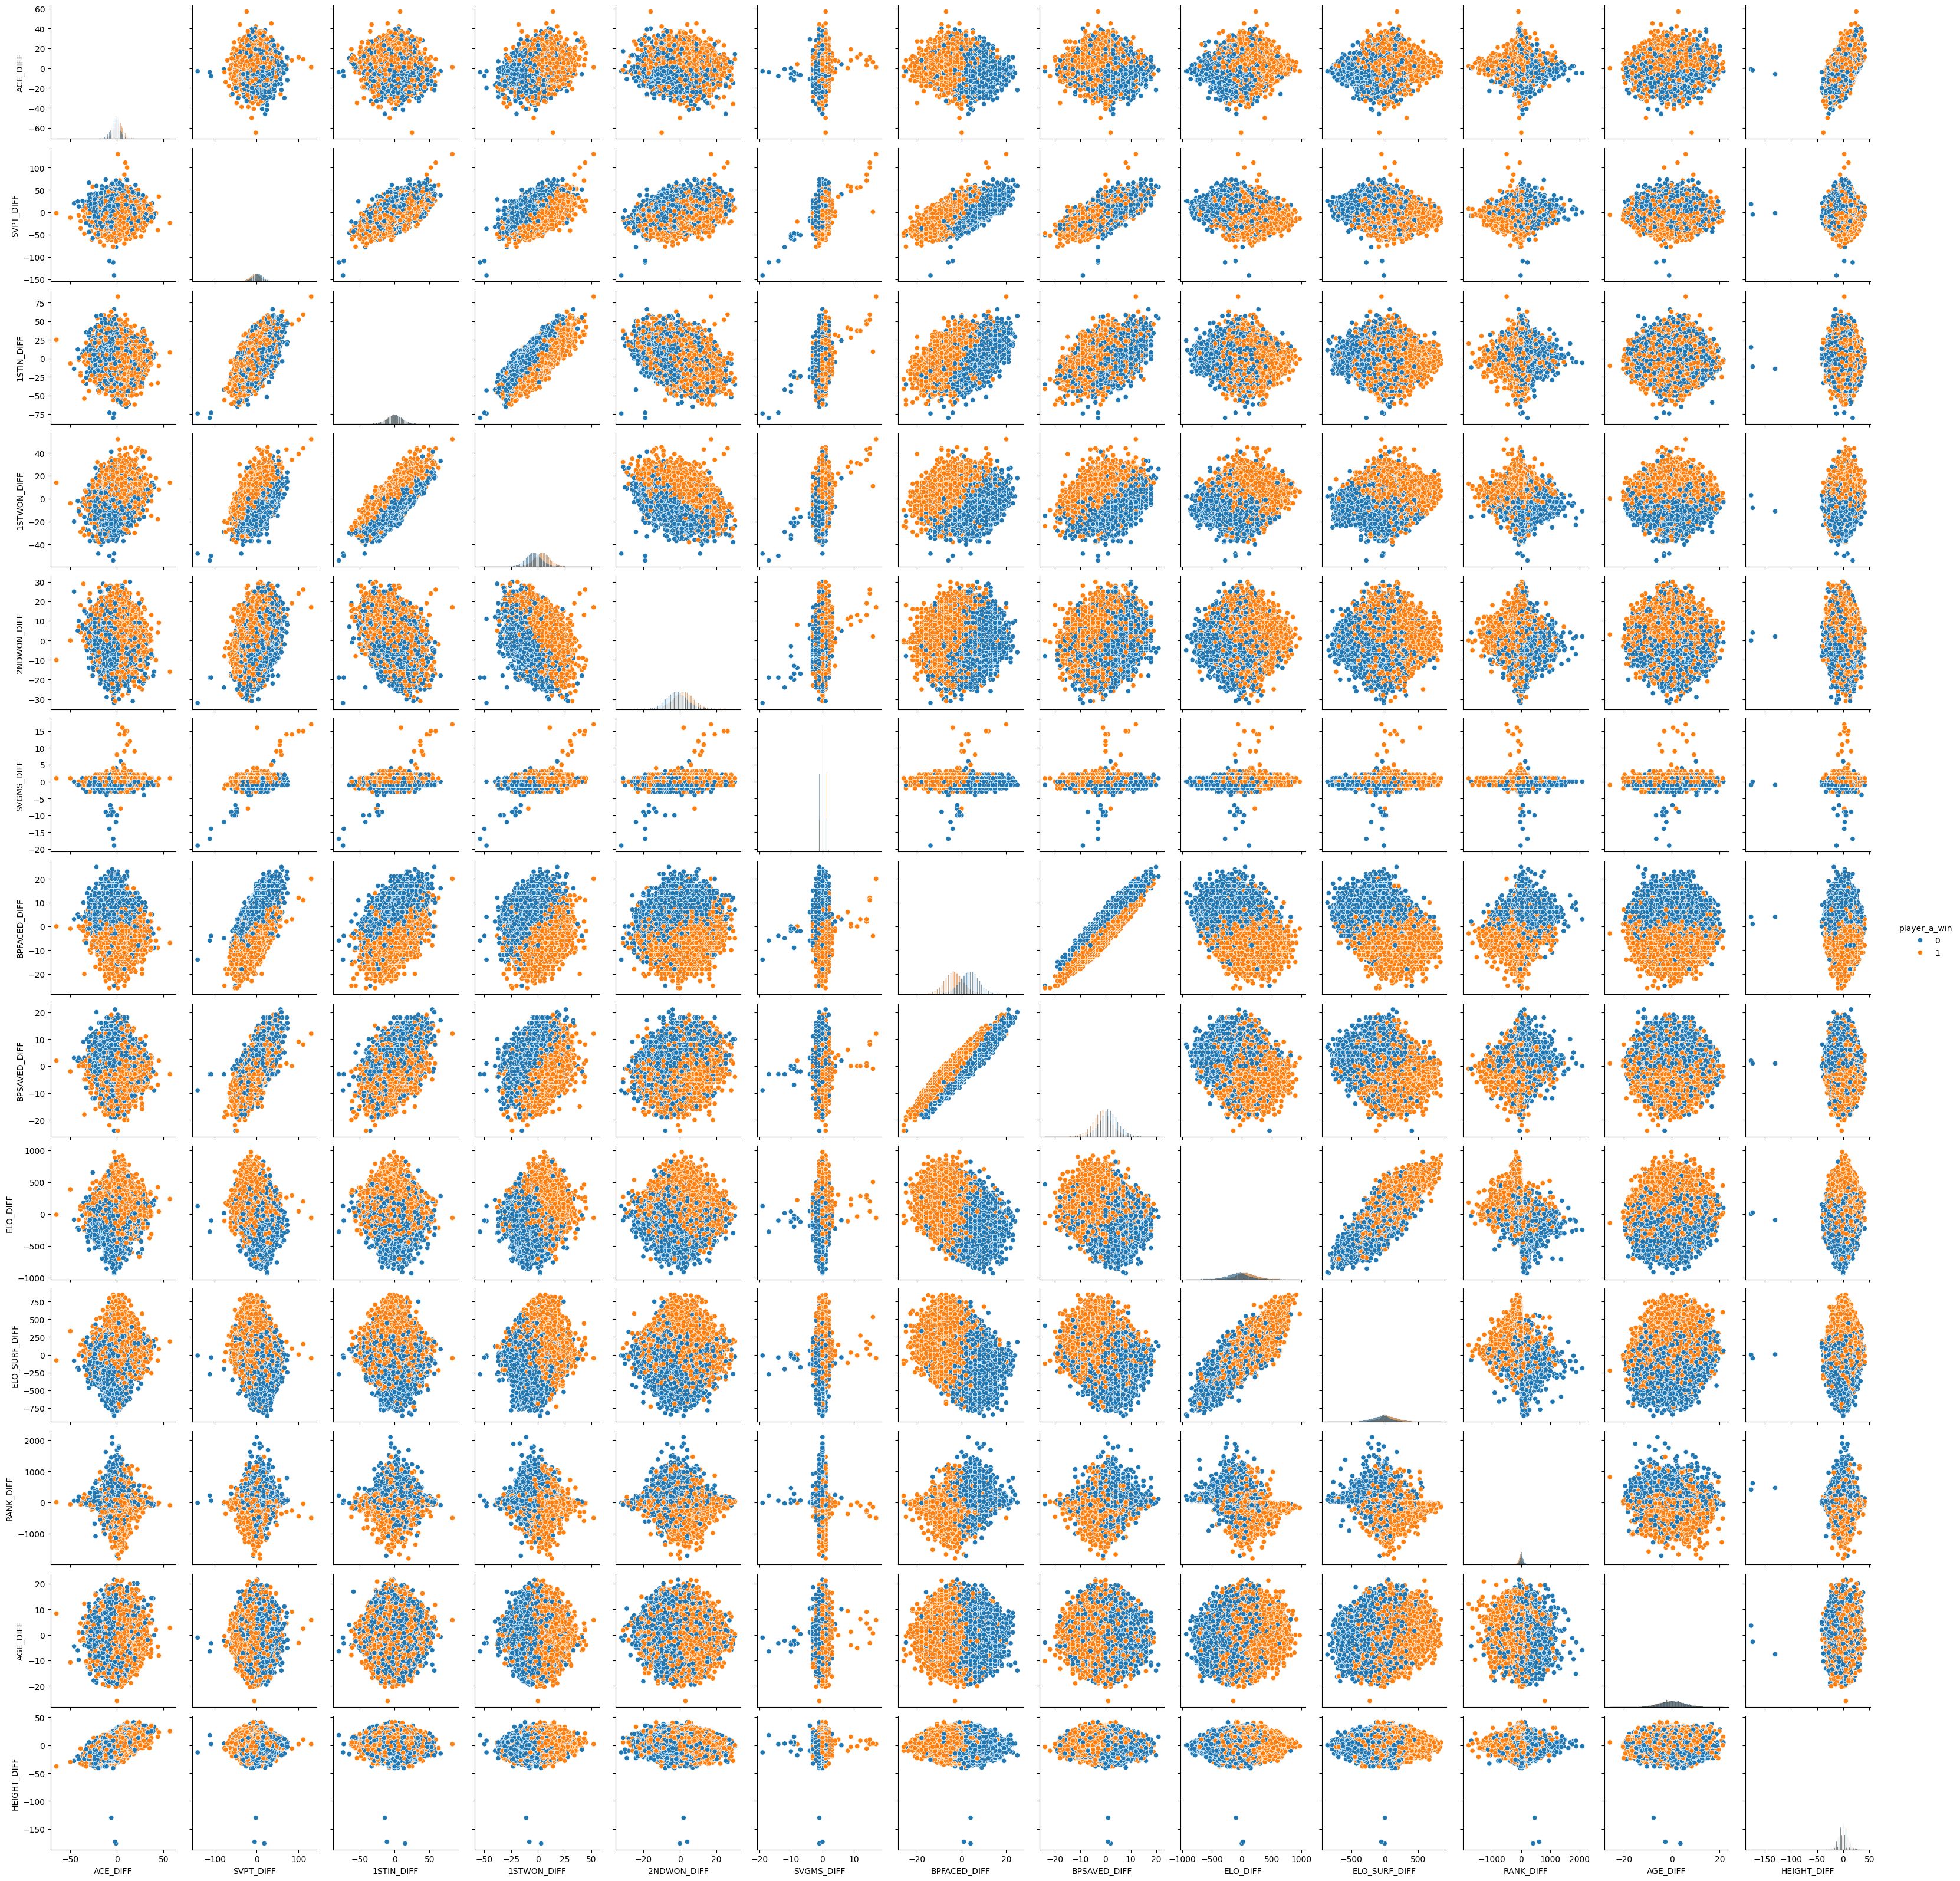

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

features = [
    'ACE_DIFF',
    'SVPT_DIFF',
    '1STIN_DIFF',
    '1STWON_DIFF',
    '2NDWON_DIFF',
    'SVGMS_DIFF',
    'BPFACED_DIFF',
    'BPSAVED_DIFF',
    'ELO_DIFF',
    'ELO_SURF_DIFF',
    'RANK_DIFF',
    'AGE_DIFF',
    'HEIGHT_DIFF'
]

try:
    g=sns.pairplot(ml[features + ['player_a_win']], hue='player_a_win', diag_kind='hist')

    plt.show()
except Exception as e:
    print(e)

In [27]:
features_ml = [
    "PA_NAME",
    "PB_NAME",
    'ACE_DIFF',
    'SVPT_DIFF',
    '1STIN_DIFF',
    '1STWON_DIFF',
    '2NDWON_DIFF',
    'SVGMS_DIFF',
    'BPFACED_DIFF',
    'BPSAVED_DIFF',
    'ELO_DIFF',
    'ELO_SURF_DIFF',
    'RANK_DIFF',
    'AGE_DIFF',
    'HEIGHT_DIFF',
    'player_a_win'
]

ml[features_ml]

PA_NAME              PB_NAME  ACE_DIFF  SVPT_DIFF  1STIN_DIFF  \
0         Jaime Oncins   Malivai Washington       1.0      -11.0       -10.0   
1      Andrew Sznajder      Alex Antonitsch       1.0       17.0        15.0   
2         Robbie Weiss      Thomas Hogstedt       1.0      -14.0       -13.0   
3        Markus Zoecke       Omar Camporese       5.0       22.0        25.0   
4          Luiz Mattar      Ramesh Krishnan       0.0        7.0        -7.0   
...                ...                  ...       ...        ...         ...   
90803  Luca Van Assche       Juncheng Shang       1.0       -2.0         7.0   
90804   Juncheng Shang  Nishesh Basavareddy      -8.0       14.0        -1.0   
90805  Luca Van Assche  Nishesh Basavareddy       8.0      -13.0        -5.0   
90806     Joao Fonseca         Learner Tien       4.0       -9.0       -10.0   
90807     Learner Tien       Alex Michelsen      -2.0       -6.0       -14.0   

       1STWON_DIFF  2NDWON_DIFF  SVGMS_DIFF  BPFACED_DIFF  BPSAVED_DIFF  \
0             -8.0          3.0         0.0          -3.0          -3.0   
1             14.0          2.0         0.0           1.0           4.0   
2            -14.0          0.0         0.0          -2.0          -5.0   
3              9.0         -9.0         0.0          15.0          11.0   
4             -9.0          1.0        -1.0           3.0           0.0   
...            ...          ...         ...           ...           ...   
90803          4.0          2.0         1.0          -9.0          -9.0   
90804         -8.0          9.0         1.0           5.0           1.0   
90805          4.0          0.0         0.0         -11.0          -9.0   
90806          1.0          5.0         0.0          -6.0          -4.0   
90807         -7.0          9.0         0.0          -5.0          -3.0   

         ELO_DIFF  ELO_SURF_DIFF  RANK_DIFF  AGE_DIFF  HEIGHT_DIFF  \
0        0.000000       0.000000       20.0      -1.0         16.0   
1        0.000000       0.000000       40.0      -1.2        -13.0   
2        0.000000       0.000000       -2.0      -3.2         -7.0   
3        0.000000       0.000000      122.0       0.0          8.0   
4        0.000000       0.000000      -36.0      -2.2         13.0   
...           ...            ...        ...       ...          ...   
90803 -194.093302    -173.069869       78.0       0.7         -2.0   
90804  168.089594     138.487490      -88.0       0.2          0.0   
90805   -0.969131      -9.901596      -10.0       0.9         -2.0   
90806   54.349234      47.534442       23.0      -0.7          5.0   
90807 -142.038079    -126.161790       81.0      -1.3        -13.0   

       player_a_win  
0                 1  
1                 1  
2                 0  
3                 0  
4                 0  
...             ...  
90803             1  
90804             0  
90805             1  
90806             1  
90807             1  

[90808 rows x 16 columns]

In [29]:
ml[features_ml].to_csv('../merged_tennis_files/xgb_dataset_ml.csv', index=False)